In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [34]:
df= pd.read_csv("StudentPerformanceFactors.csv")
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [35]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
df=df.dropna(how='any')

In [5]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [6]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
data=df[['Hours_Studied','Attendance','Previous_Scores','Exam_Score']]
data

,Hours_Studied,Attendance,Previous_Scores,Exam_Score
0,23,84,73,67
1,19,64,59,61
2,24,98,91,74
3,29,89,98,71
4,19,92,65,70
...,...,...,...,...
6602,25,69,76,68
6603,23,76,81,69
6604,20,90,65,68
6605,10,86,91,68


In [8]:
data=data.drop_duplicates()
print("Duplicate records : ",data.duplicated().sum())

Duplicate records :  0


In [9]:
data.isnull().sum()

Hours_Studied      0
Attendance         0
Previous_Scores    0
Exam_Score         0
dtype: int64

In [10]:
print(data.describe())

       Hours_Studied   Attendance  Previous_Scores   Exam_Score
count    6300.000000  6300.000000      6300.000000  6300.000000
mean       19.983175    80.013968        75.031429    67.252698
std         5.997992    11.562930        14.395552     3.923375
min         1.000000    60.000000        50.000000    55.000000
25%        16.000000    70.000000        63.000000    65.000000
50%        20.000000    80.000000        75.000000    67.000000
75%        24.000000    90.000000        88.000000    69.000000
max        44.000000   100.000000       100.000000   101.000000


<Axes: >

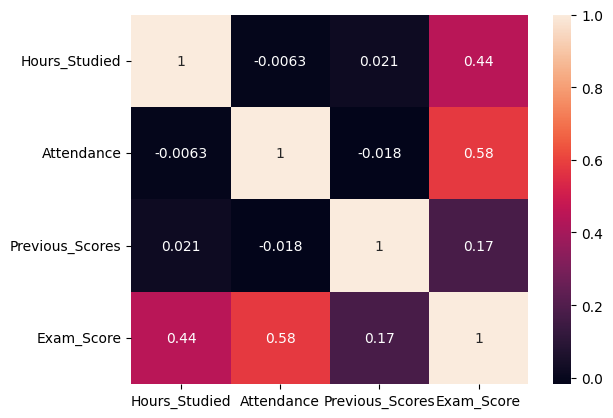

In [11]:
data1=data.corr()
sns.heatmap(data1,annot=True)

In [36]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score'], dtype='object')

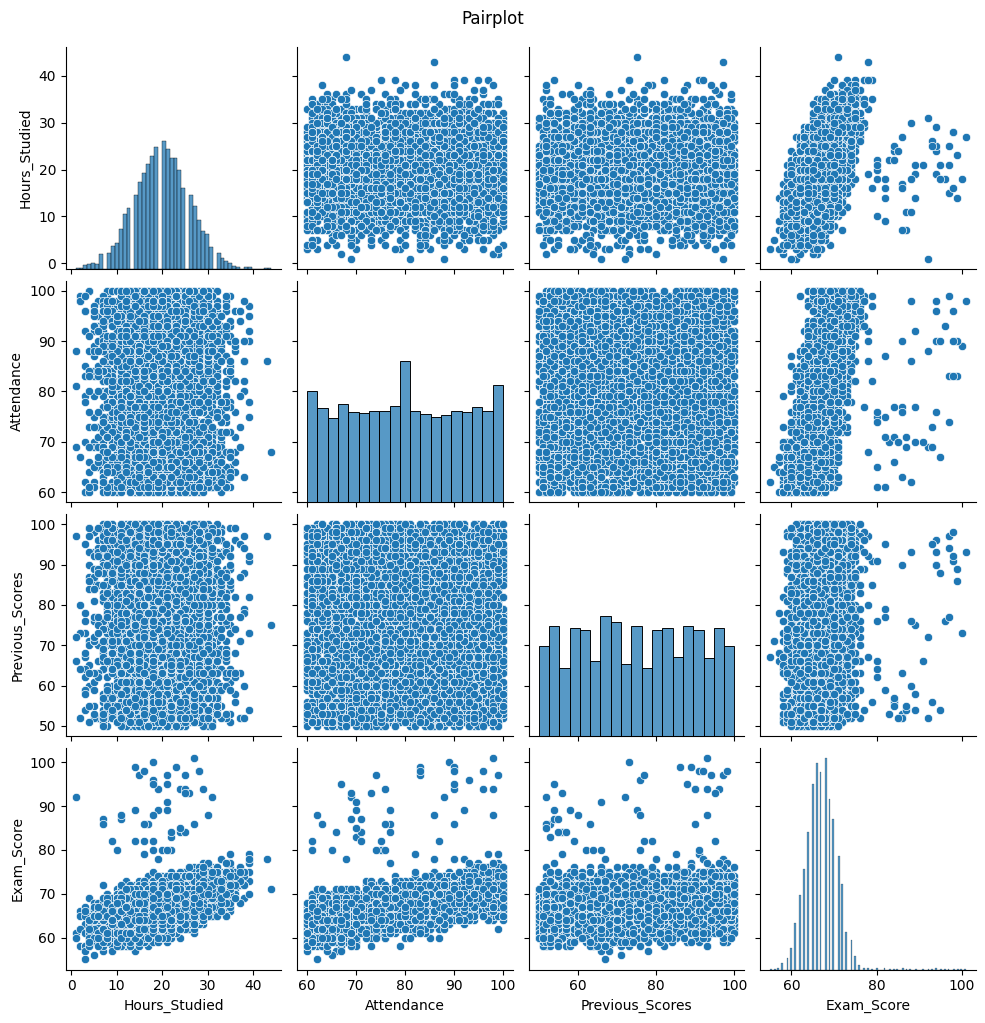

In [39]:
sns.pairplot(data)
plt.suptitle('Pairplot', y=1.02)
plt.show()

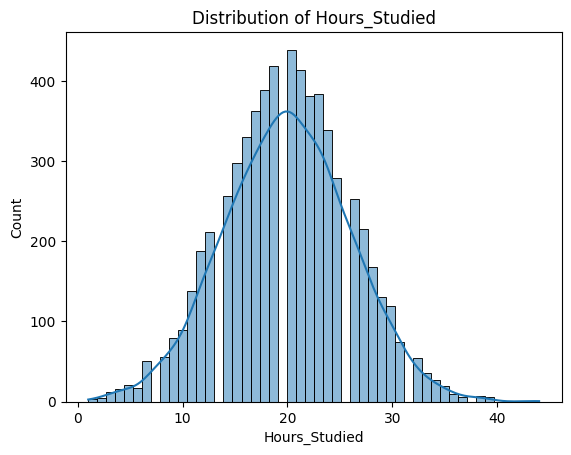

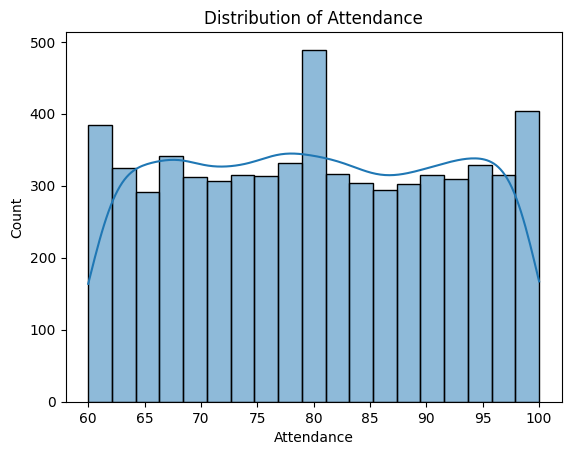

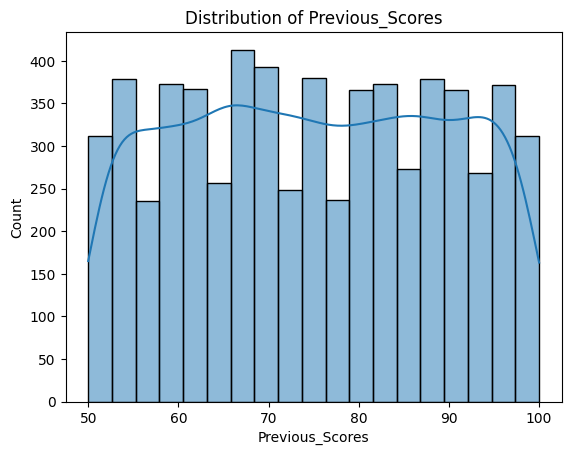

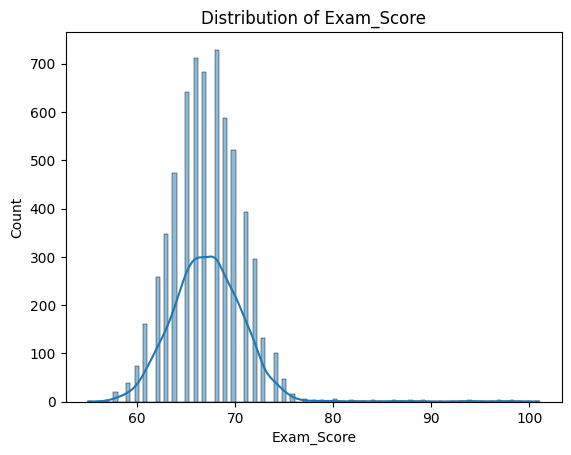

In [43]:
for col in ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


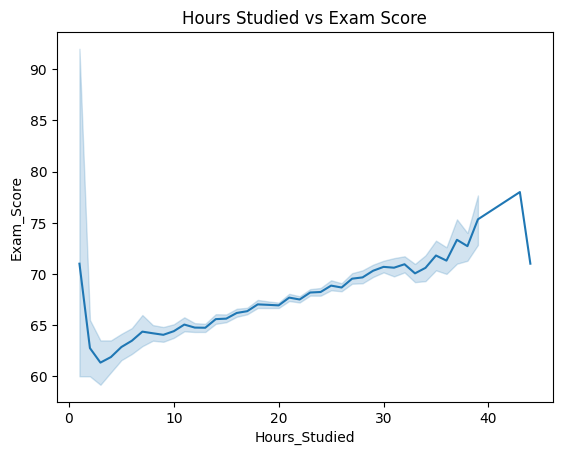

In [44]:
sns.lineplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.title("Hours Studied vs Exam Score")
plt.show()


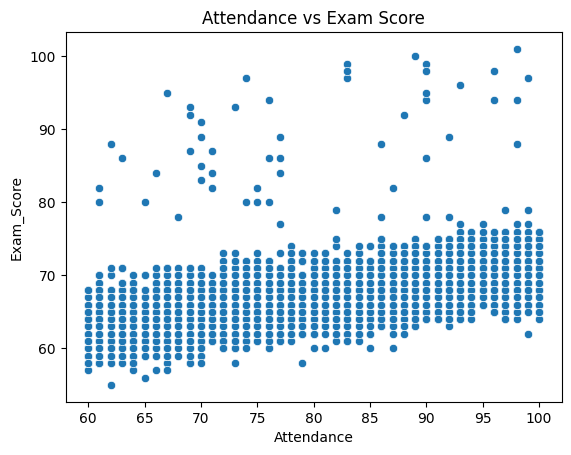

In [ ]:
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
plt.title("Attendance vs Exam Score")
plt.show()

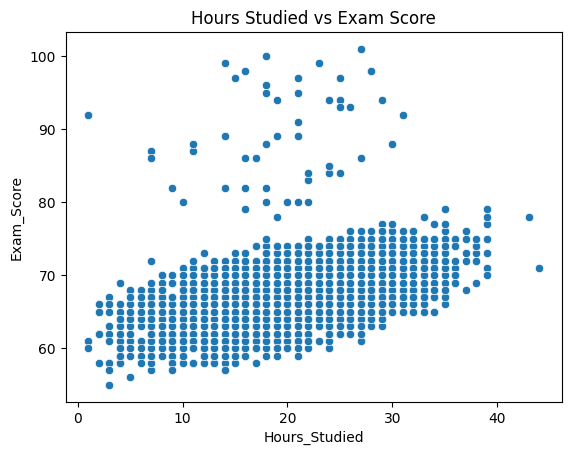

In [46]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied vs Exam Score")
plt.show()


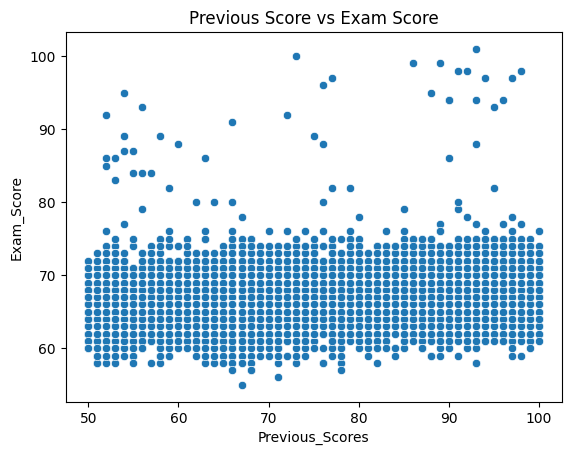

In [47]:

sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df)
plt.title("Previous Score vs Exam Score")
plt.show()

In [13]:
#Here our data is ready so now time to train it.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
x=data[['Attendance','Hours_Studied','Previous_Scores']]
y=data[['Exam_Score']]

In [15]:
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
#Models test
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

In [26]:
model1 = LinearRegression()
model2 = Ridge(alpha=0.1)
model3 = SVR(kernel='rbf')
model4 = RandomForestRegressor(n_estimators=100, max_depth=21, random_state=20,min_samples_split=8,min_samples_leaf=2,max_features='sqrt')
model5 = DecisionTreeRegressor( max_depth=11, criterion='absolute_error')

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
model5.fit(x_train, y_train)


c:\Users\Soyal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Soyal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,criterion,'absolute_error'
,splitter,'best'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [27]:
print("Training score 1: ",round(model1.score(x_train,y_train)*100,2))
print("Testing score  1: ",round(model1.score(x_test,y_test)*100,2))

print("Training score 2: ",round(model2.score(x_train,y_train)*100,2))
print("Testing score  2: ",round(model2.score(x_test,y_test  )*100,2))

print("Training score 3: ",round(model3.score(x_train,y_train)*100,2))
print("Testing score  3: ",round(model3.score(x_test,y_test  )*100,2))

print("Training score 4: ",round(model4.score(x_train,y_train)*100,2))
print("Testing score  4: ",round(model4.score(x_test,y_test  )*100,2))

print("Training score 5: ",round(model5.score(x_train,y_train)*100,2))
print("Testing score  5: ",round(model5.score(x_test,y_test  )*100,2))


Training score 1:  56.6
Testing score  1:  56.33
Training score 2:  56.6
Testing score  2:  56.33
Training score 3:  56.2
Testing score  3:  56.22
Training score 4:  72.16
Testing score  4:  52.33
Training score 5:  73.04
Testing score  5:  32.94


In [28]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=2,subsample=0.7,gamma=2)
xgb_model.fit(x_train, y_train)
print("Training score 5: ",round(xgb_model.score(x_train,y_train)*100,2))
print("Testing score  5: ",round(xgb_model.score(x_test,y_test)*100,2))

Training score 5:  59.66
Testing score  5:  55.08


In [20]:
y_pred = xgb_model.predict(x_test)

print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 2))


MAE: 1.46
MSE: 6.23
R² Score: 0.55


In [21]:
models = [model1, model2, model3, model4, model5]
model_names = ['LinearRegression', 'Ridge', 'SVR', 'Random Forest', 'Decision Tree']

for name, m in zip(model_names, models):
    y_pred = m.predict(x_test)
    print(f"\n{name}")
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
    print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
    print("R² Score:", round(r2_score(y_test, y_pred), 2))


LinearRegression
MAE: 1.4
MSE: 6.06
R² Score: 0.56

Ridge
MAE: 1.4
MSE: 6.06
R² Score: 0.56

SVR
MAE: 1.4
MSE: 6.08
R² Score: 0.56

Random Forest
MAE: 1.5
MSE: 6.48
R² Score: 0.53

Decision Tree
MAE: 1.98
MSE: 13.39
R² Score: 0.04


In [32]:
import joblib
joblib.dump(model1,'Basemodel.pkl')

['Basemodel.pkl']

In [ ]:
#Now Advaced Case study for student